# K-means from Scratch
This is a code to recreate the K-means algorithm from scratch using numpy, matplotlib and csv libraries

For this example, i will be using a dataset representing a sample of individuals that are uniques.

Variables of the dataset : 
- CGPA, This variable represents the average grade points obtained by each individual throughout their academic career
- IQ, This variable represents the intelligence quotient of each individual, which is a numerical measure of their cognitive abilities

## Import libraries


In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

## Import the data
this function while take the data (csv) and return it in a list without the column name

In [3]:
def load_data(filename):
    with open(filename, 'r') as file:
        # Skip the first line of the csv
        next(file) 
        data_reader = csv.reader(file)
        data = []
        for row in data_reader:
            data.append([float(val) for val in row])
        return np.array(data)

## Euclidian distance

Compute the distance between two points 

here is the formula :

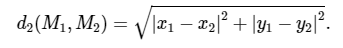

In [4]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

## Find Clusters

Calculate the minimal distance between a point and the centroid of a cluster using euclidean_distance()

In [5]:
def find_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

## Update the clusters

find the best centroid using find_cluster()

In [6]:
def update_centroids(data, clusters, k):
    centroids = []
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    return np.array(centroids)

## Randomize centroids

- We are gonig to go through the dataset and initialize our first random centroids
- Then we need to find the clusters with our first centroids 
- The next step is to iterate on the dataset to find the minimal distance between points in a cluster and the points in the middle of the cluster (centroids)

In [7]:
def kmeans(data, k, max_iteration):

    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for i in range(max_iteration):
        clusters = find_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        
        if np.array_equal(new_centroids, centroids):
            break
        
        centroids = new_centroids
    
    return clusters, centroids

## Plot clusters

function to plot cluster with different parameters

In [28]:
def plot_diff_k(clusters, centroids, data, k):
    plt.figure(figsize=(8, 6))
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id + 1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', label='Centroids')
    plt.title(f'Data After Clustering ({k} clusters)')
    plt.xlabel('CPGA')
    plt.ylabel('IQ')
    plt.legend()
    plt.show()

## Get the data

In [16]:
data = load_data('student_clustering.csv')

## Display the dataset

### Before the clustering

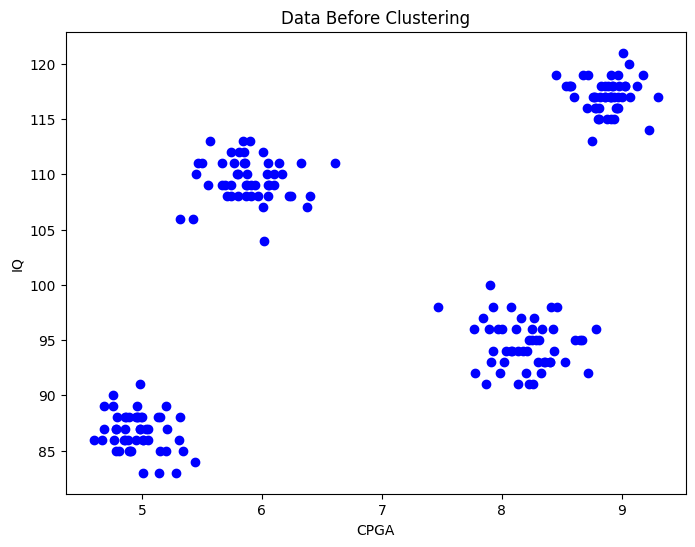

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data points')
plt.title('Data Before Clustering')
plt.xlabel('CPGA')
plt.ylabel('IQ')
plt.show()

## Implementation

- Load the data with the function "load_data"
- Choose the number of clusters (in my case it is 4)
- Use the kmeans function to find the clusters and centroids

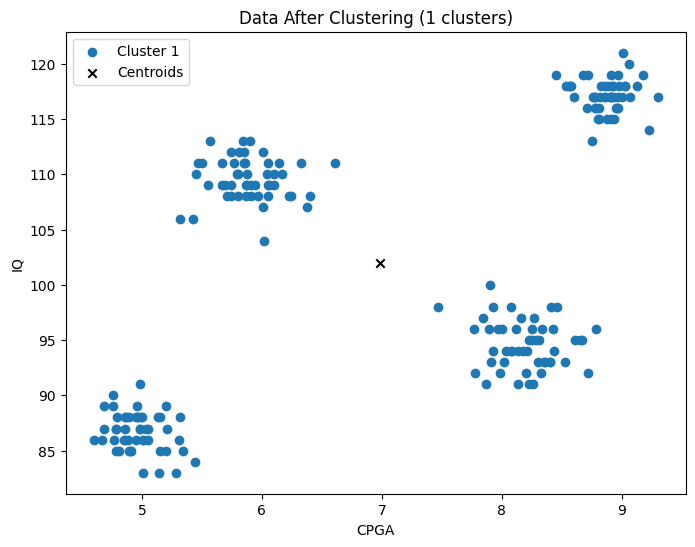

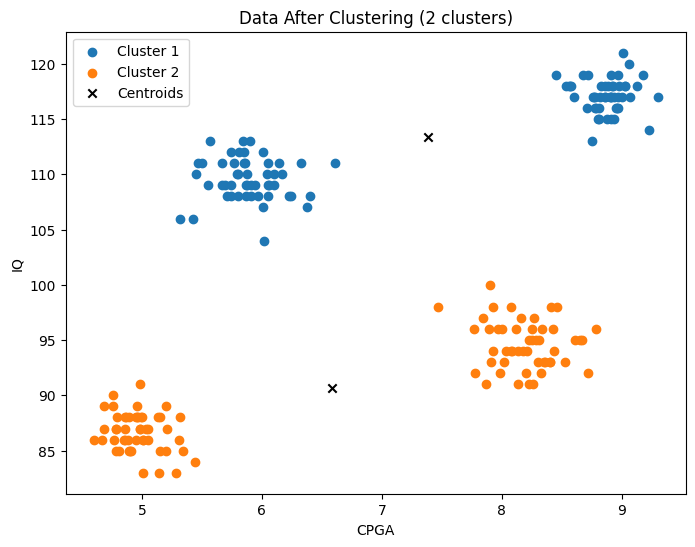

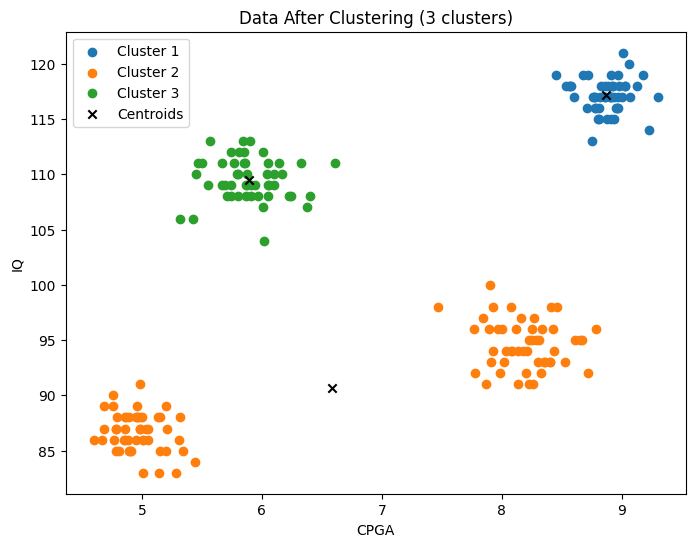

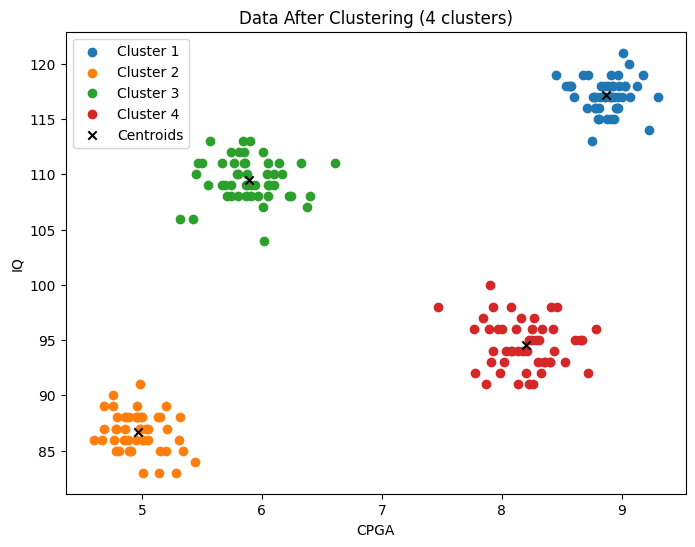

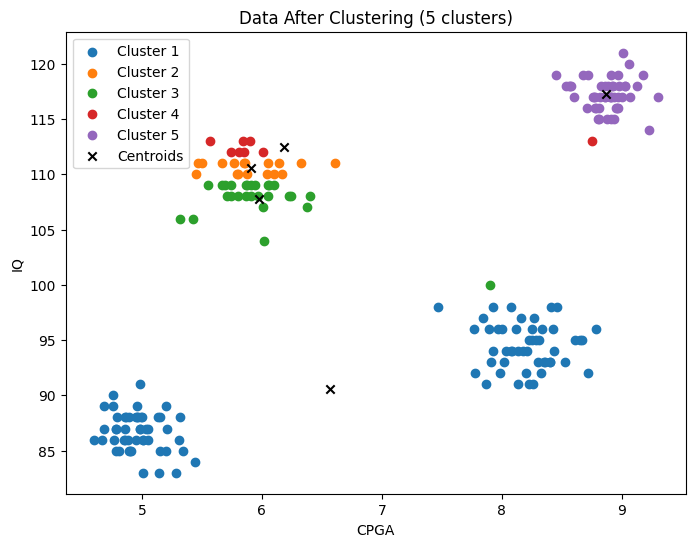

In [29]:
for k in range(1, 6):
    clusters, centroids = kmeans(data, k, 100)
    plot_diff_k(clusters, centroids, data, k)